In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.random.seed(1234)

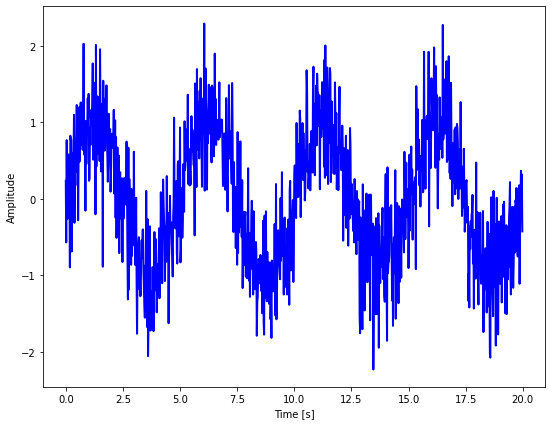

In [3]:
time_step = 0.02
period = 5.0

time = np.arange(0, 20, time_step)
noise = 0.5 * np.random.randn(time.size)
signal = np.sin(2 * np.pi / period * time) + noise

fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111)

ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')

ax.plot(time, signal, label='Original signal', linewidth=2, color='blue', linestyle='-')

In [4]:
from scipy import fftpack
sig_fft = fftpack.fft(signal)
power = np.abs(sig_fft)**2

sample_freq = fftpack.fftfreq(signal.size, d=time_step)

pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_signal = fftpack.ifft(high_freq_fft)

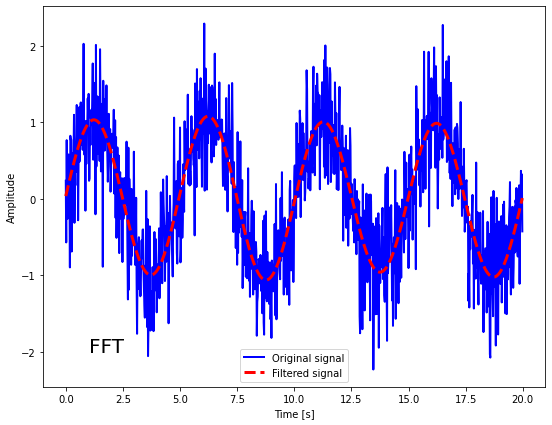

In [5]:
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111)

ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')

time_step = 0.02
period = 5.0

filtered_signal = filtered_signal.real

ax.plot(time, signal, label='Original signal', linewidth=2, color='blue', linestyle='-')
ax.plot(time, filtered_signal, label='Filtered signal', linewidth=3, color='red', linestyle='--')

ax.text(1, -2, 'FFT', fontsize=20)

ax.legend(loc='best') 